<a href="https://colab.research.google.com/github/StacyChebet/Netflix-EDA/blob/master/Netflix_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

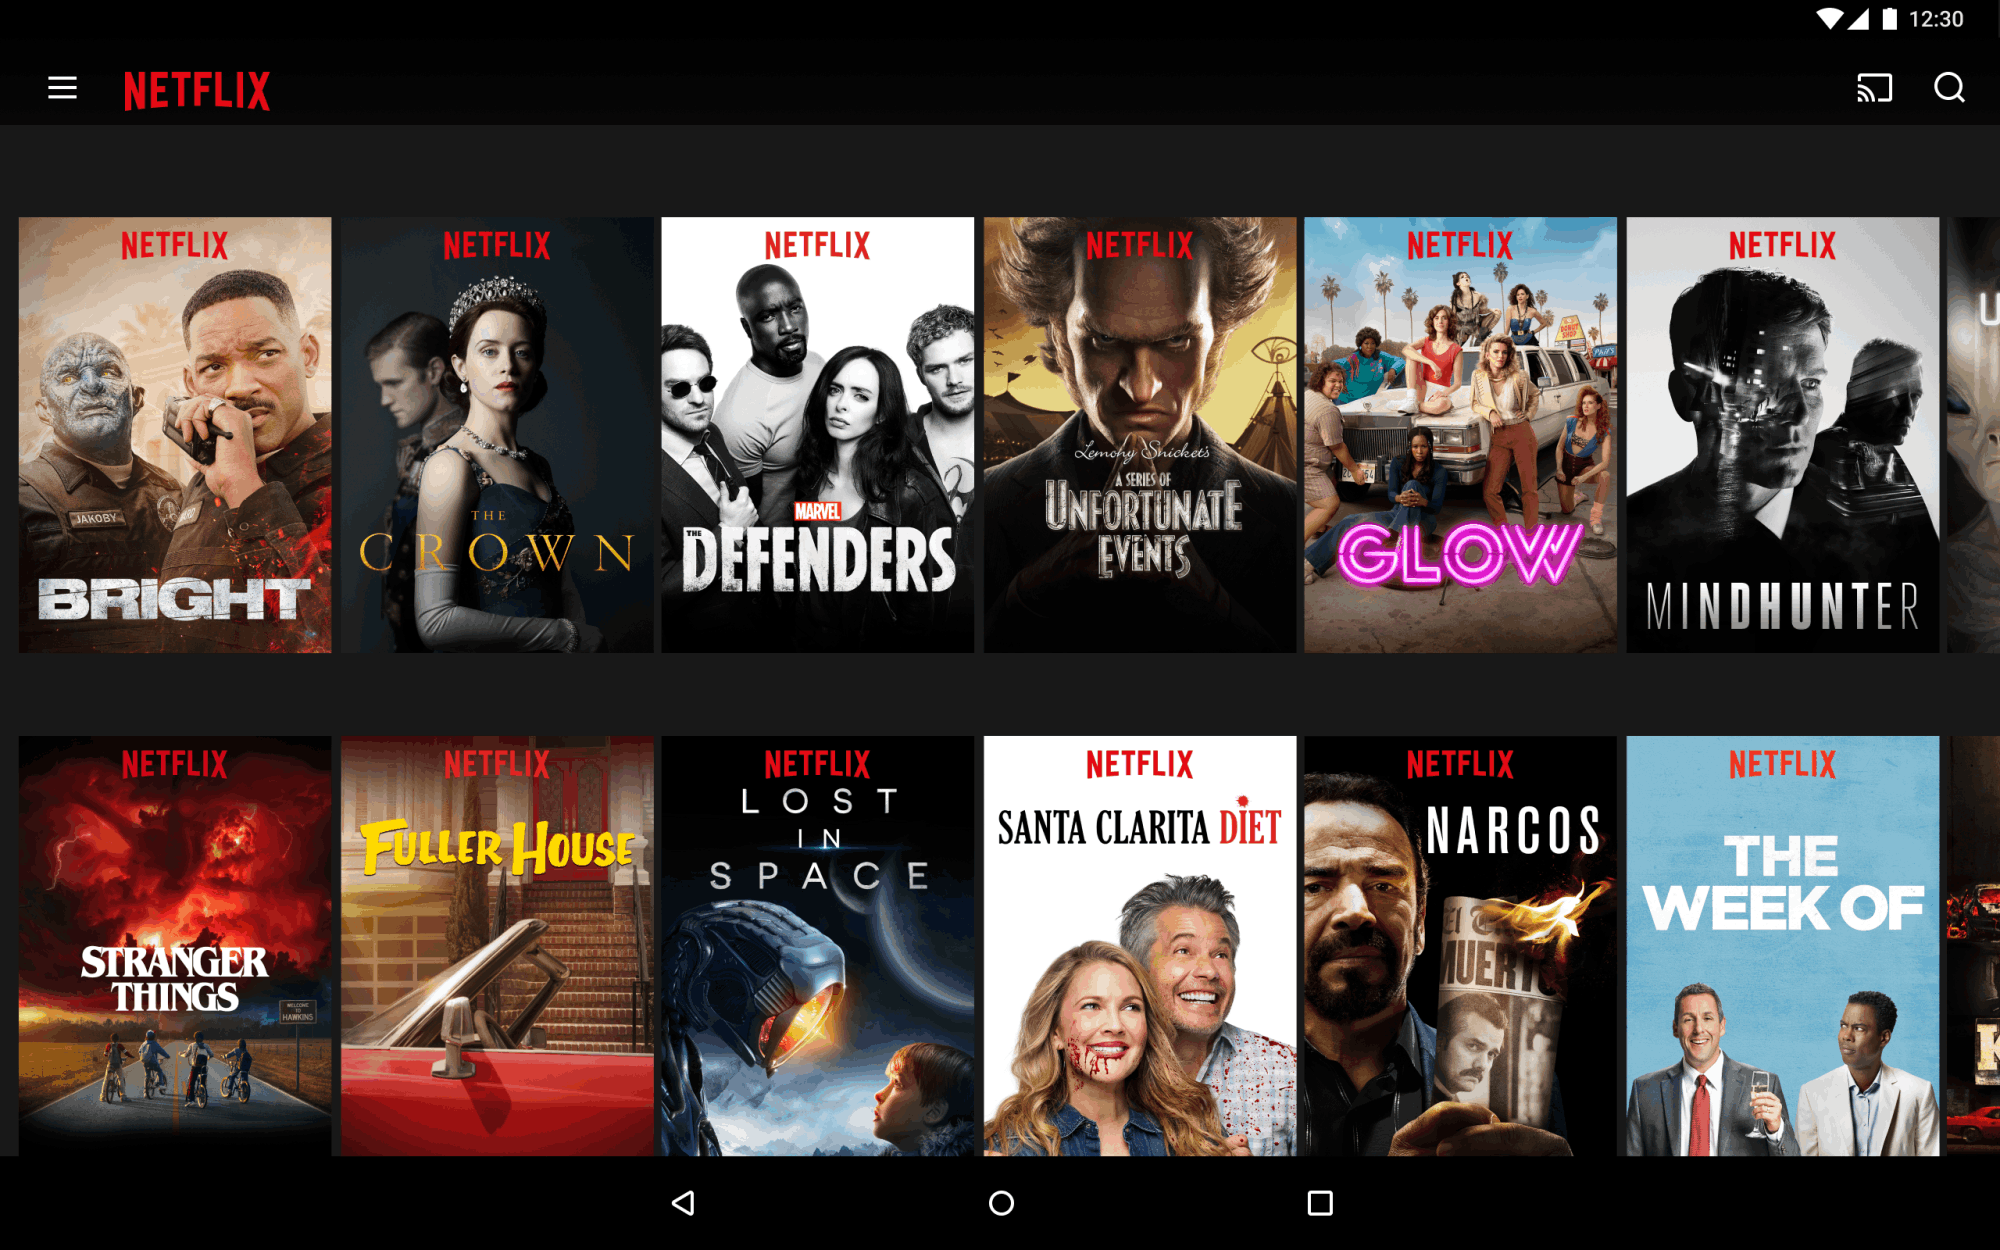

# **📖 What This Notebook is About**
In this notebook, I'll be performing **Exploratory Data Analysis (EDA)** on the Netflix dataset to uncover trends, patterns and insights.<br>
Expect to see visualizations of content distribution, country contributions, release trends, and more!<br>
We'll dive deep into:
- What types of content are most popular on Netflix?
- Which countries dominate the Netflix catalog?
- How does content vary across genres and ratings?
- Fun visualizations showing content trends over time!

By the end, you'll have a clear picture of what makes Netflix's 2021 library tick, through data, of course! 🍿📈



# **📊 Dataset Overview**
This dataset provides a comprehensive list of Netflix titles as of 2021, including both movies and TV shows. It containts various columns such as:
- `type` - Movie or TV Show
- `title` - The name of the content
- `director` & `cast` - The creative minds behind and infront of the camera
- `country` - Where the content was produced
- `date_added` & `release_year` - When it was added to Netflix and when it was released
- `rating` - Netflix's rating (is it kid-friendly or more mature?)
- `duration` - The length of the movie or number of seasons for TV Shows
- `listed_in` - Genre categories
- `description` - A brief summary of the content

# **Loading Libraries and Data** <br>
Libraries used: <br>
**Pandas:** For data manipulation <br>
**Numpy:** For numerical operations <br>
**Seaborn:** For data visualization

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting visualization styles
sns.set(style="whitegrid")

#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#Changing directory
%cd /content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Netflix

#Loading the dataset
file_path = "netflix_titles_2021.csv"
df = pd.read_csv(file_path)

#Displaying the first few rows of the dataset
df.head()

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**Initial Data Exploration**


In [2]:
#Checking the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

#Displaying the data types of each column
print("\n Data types of each column:")
print(df.dtypes)

#Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)

The dataset contains 8807 rows and 12 columns.

 Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Summary of the dataset:
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0  


#**Summary Findings**
- **Oldest Title:** The earliest title on Netflix dates all the way back to **1925**
- **Newest Title:** The most recent titles, at the time, were from 2021; which is when the dataset was compiled.
- **Average Release Year:** On average, Netflix content was released around **2014**, suggesting a strong focus on relatively modern shows and movies.
- **Content Distribution:**
 - 25% of titles were released before **2013**
 - 50% (median) were released by **2017**
 - 75% came out by **2019**

This shows that:
- Netflix has a growing focus on newer content, especially the 2010s.
- There's a heavier concentration of recent titles, which could reflect its increased investment in producing and acquiring modern content.
- The long tail of older content (like the 1925 classic) adds variety, but is not the platform's main focus.

#**Identifying Categorical and Numerical Variables**


In [3]:
#Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
Numerical Variables: ['release_year']


#**Checking for Missing Values**


In [4]:
#Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#**Missing Values Analysis**
Missing data can significantly affect the outcomes of our analysis and predictive modeling. <br>
Here's a breakdown of missing values across different columns in the dataset:
- `show_id`, `type`, `title`, `release_year`, `listed_in`, `description`: No missing values, which simplifies preprocessing for these columns.
- `duration`: 3 missing values. There is need to make a decision whether to impute or remove these values.
- `rating`: 4 missing values. Just like with `duration`, a decision on whether to remove or impute needs to be made.
- `date_added`: 10 missing values, which is small compared to the size of the dataset. May opt for simple imputation methods like mode replacement.
- `cast`: 825 missing values, which is a significant number that requires careful consideration for imputation, as it could impact analysis related to the actors.
- `country`: 831 missing values, and as with `cast`, careful consideration for imputation is required.
- `director`: 2634 missing values. This is a very significant number that could affect analysis related to directors.

#**Check for Unique Values to Understand Cardinality**


In [5]:
#Check the number of unique values in each column:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


#**Cardinality Analysis**
Understanding cardinality is important for identifying features with a wide range of values and those with limited variety.<br>
Below is a summary of the cardinality in each column of the dataset:
- `show_id`: 8807 unique values, which is equal to the number of rows in the dataset.
- `type`: 2 unique values, which are TV Show and Movie. This is great for binary comparisons. Some comparisons include:
 - Counts over time
 - Contrasting genre distribution
 - Analyzing rating/duration by type
- `title`: 8807 unique values, equal to the number of rows. Could exlpore:
 - Are there titles with the same name but different metadata?
 - What's the most common title word?
- `director`: 4528 unique values. Many directors appear once, but some are frequent collaborators. Great for:
 - Analyzing top 10 or 20 directors
 - Visualizing who's producing the most for Netflix.
- `cast`: 7692 unique values. Shows that the actors vary a lot per title. Some explorations:
 - Finding the most frequent actors.
 - Finding common actor pairings.
-`country`: 748 unique values which shows a global catalog. Some explorations:
 - Seeing which countries contribute the most content
 - Exploring trends in content type or genre by country
- `date_added`: 1767 unique values, which shows that Netflix has added content on many different dates. I can:
 - Track when Netflix increases content aqcuisition.
 - Check for seasonal trends in additions (e.g. holidays, quarter ends)
- `release_year`: 74 unique values. The content spans from 1925 to 2021. There are not too many unique years, which is perfect for time-series or decade-wise trends.
- `rating`: 17 unique values, which is moderate variety. Some explorations:
 - Exploring distribution by type or country
 - Seeing if Netflix leans more towards family-friendly or mature content
- `duration`: 220 unique values, which will be more useful when split into minutes or seasons. I can:
 - Visualize duration distribution
 - Compare TV shows by season count or movies by runtime
- `listed_in`: 514 unique values. There are multiple genres and categories per title. There is moderate cardinality so:
 - Cleaning + exploding the list to analyze popular genres
 - Grouping genres by content type, country or year
- `description`: 8775 unique values which shows that nearly every title has a unique description.

#**Treating Missing Values in the Dataset**
The following columns have missing values that need to be addressed before further analysis:
- `director`: Some content (especially reality shows, stand-ups, etc.) might not list a director. I will impute with "Unknown" since I'll be creating visuals.
- `cast`: I will impute these values with "Unknown" for clarity.
- `country`: I will impute with "Unknown".
- `date_added`: Since 10 rows are a small number in comparison to the size of the dataset, I will drop these values.
- `rating`: I will impute the missing values with the mode, since this column is useful in filtering content by maturity.
- `duration`: I will drop these values since the number is small in comparison to the dataset size.

In [6]:
#Deleting the rows with missing `date_added` and `duration` values
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['duration'], inplace=True)

#Imputing the missing values in `rating` with mode
rating_mode = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(rating_mode)

#Imputing the missng values in `director` with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

#Imputing the missng values in `cast` with 'Unknown'
df['cast'] = df['cast'].fillna('Unknown')

#Imputing the missng values in `country` with 'Unknown'
df['country'] = df['country'].fillna('Unknown')




In [7]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


#**Dropping Unnecessary Columns**
Dropping columns that do not provide significant analytical value enables streamlining of the dataset.<br>
These columns are:
- `title`: The cardinality is too high since each row is esentially a unique title, hence not useful for aggregation
- `description`: Too unique for EDA. Would have been ideal for NLP/text mining.
- `show_id`: Just a unique identifier, hence not useful for analysis.

In [8]:
#Dropping unnecessary columns
columns_to_drop = ['title', 'description', 'show_id']
df = df.drop(columns=columns_to_drop)

#Displaying the first few rows to confirm changes
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#**Univariate Analysis**
**Numerical Variables**
1. **Histograms**

In [9]:
numerical_vars

['release_year']

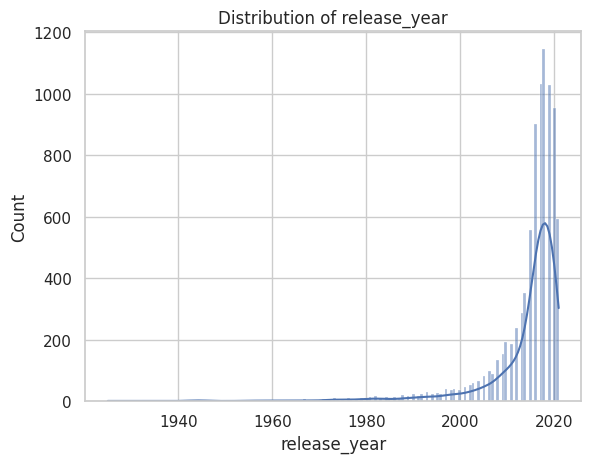

In [10]:
#Univariate analysis for numerical variables
for var in numerical_vars:
  sns.histplot(df[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()

##**Histogram Findings**
`release_year`<br>
- Left-skewed distribution, suggesting that most of the titles are from recent years.
- The mode is likely **2017-2020** which reinforces the earlier summary statistics.
- This could influence Netflix's recommendation strategies, since the algorithm will likely lean into recommending newer releases.

2. **Boxplot**
- Useful in identifying outliers and understanding the spread and symmetry of the data.


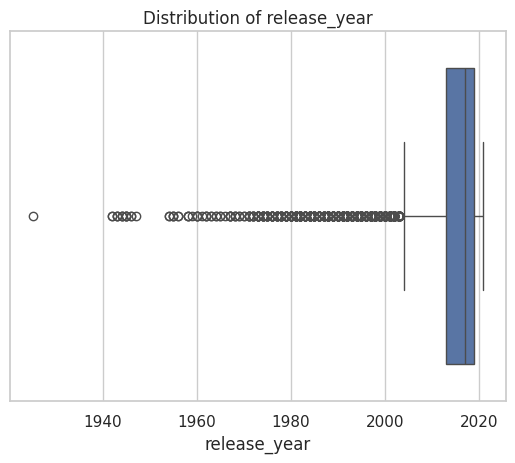

In [11]:
#Univariate analysis of numerical variables using a boxplot
for var in numerical_vars:
  sns.boxplot(x=df[var].dropna())
  plt.title(f'Distribution of {var}')
  plt.show()

##**Boxplot Findings**
- The `release_year`has a significant amount of outliers at the lower end.

###**Boxplot Findings Implications**
Since `release_year` shows extreme skewness. The skew isn't because of outliers, it's because Netflix has way more modern content.<br>
So, instead of transforming, **binning** would be the best action to take since we can group the years into eras.




###**Descriptions of the Bins**
- **Classics:** Old-school legends, probably not many but it would be cool to highlight
- **Early 2000s:** The DVD-era stuff
- **Pre-Streaming Boom (2010 - 2015):** Netflix begins dabbling
- **Streaming Surge (2016 - 2018):** Netflix original content takes off
- **COVID Era (2019 - 2021):** Massive spike in streaming


In [12]:
#Defining the bins and labels
bins = [1990, 1999, 2009, 2015, 2018, 2021]
labels = ['Classics', 'Early 2000s', 'Pre-Streaming Boom', 'Streaming Surge', 'COVID Era']

#Creating a new column
df['era'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=True)

#Checking the new column
df[['release_year', 'era']].head()


,release_year,era
0,2020,COVID Era
1,2021,COVID Era
2,2021,COVID Era
3,2021,COVID Era
4,2021,COVID Era


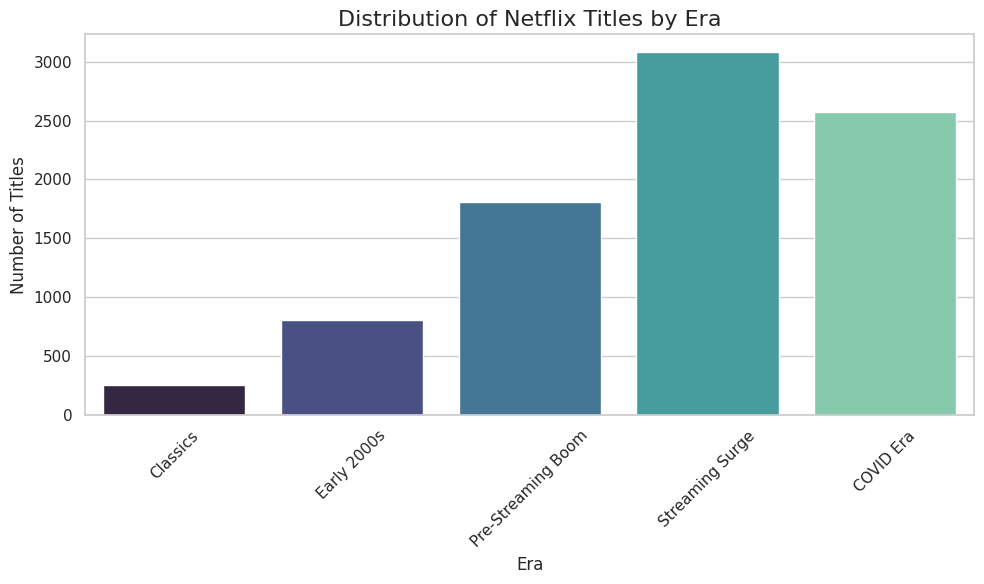

In [13]:
#Plotting the eras
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='era', hue='era', palette='mako', legend=False)
plt.title('Distribution of Netflix Titles by Era', fontsize=16)
plt.xlabel('Era', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###**Histogram Findings**
From the histogram, we see that most of the titles are from the Streaming Surge **(2016-2018)**, followed by the COVID era.

##**For Categorical Variables**
Since the values of the categorical variables are too long (other than `type` and `rating`), the best course of action would be to analyze the top 10 values for each variable, which will make it easier to read.

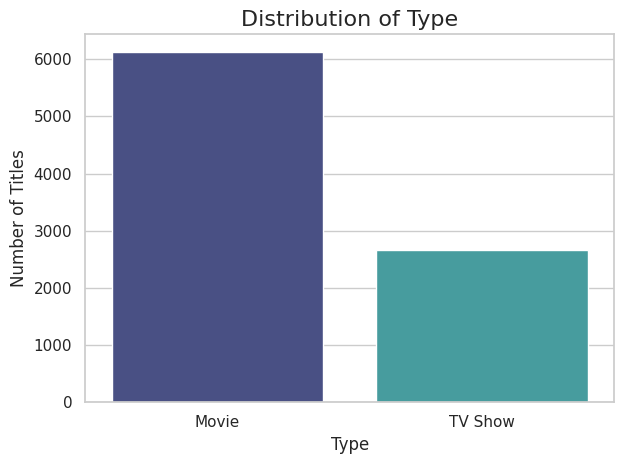

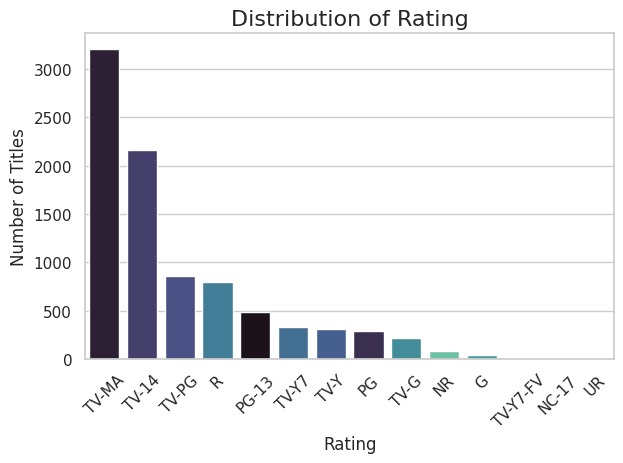

In [14]:
#Univariate analysis for type
sns.countplot(data=df, x='type', hue='type', palette='mako', order=df['type'].value_counts().index, legend=False)
plt.title('Distribution of Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.show()

#Univariate analysis for rating
sns.countplot(data=df, x='rating', hue='rating', palette='mako', order=df['rating'].value_counts().index, legend=False)
plt.title('Distribution of Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


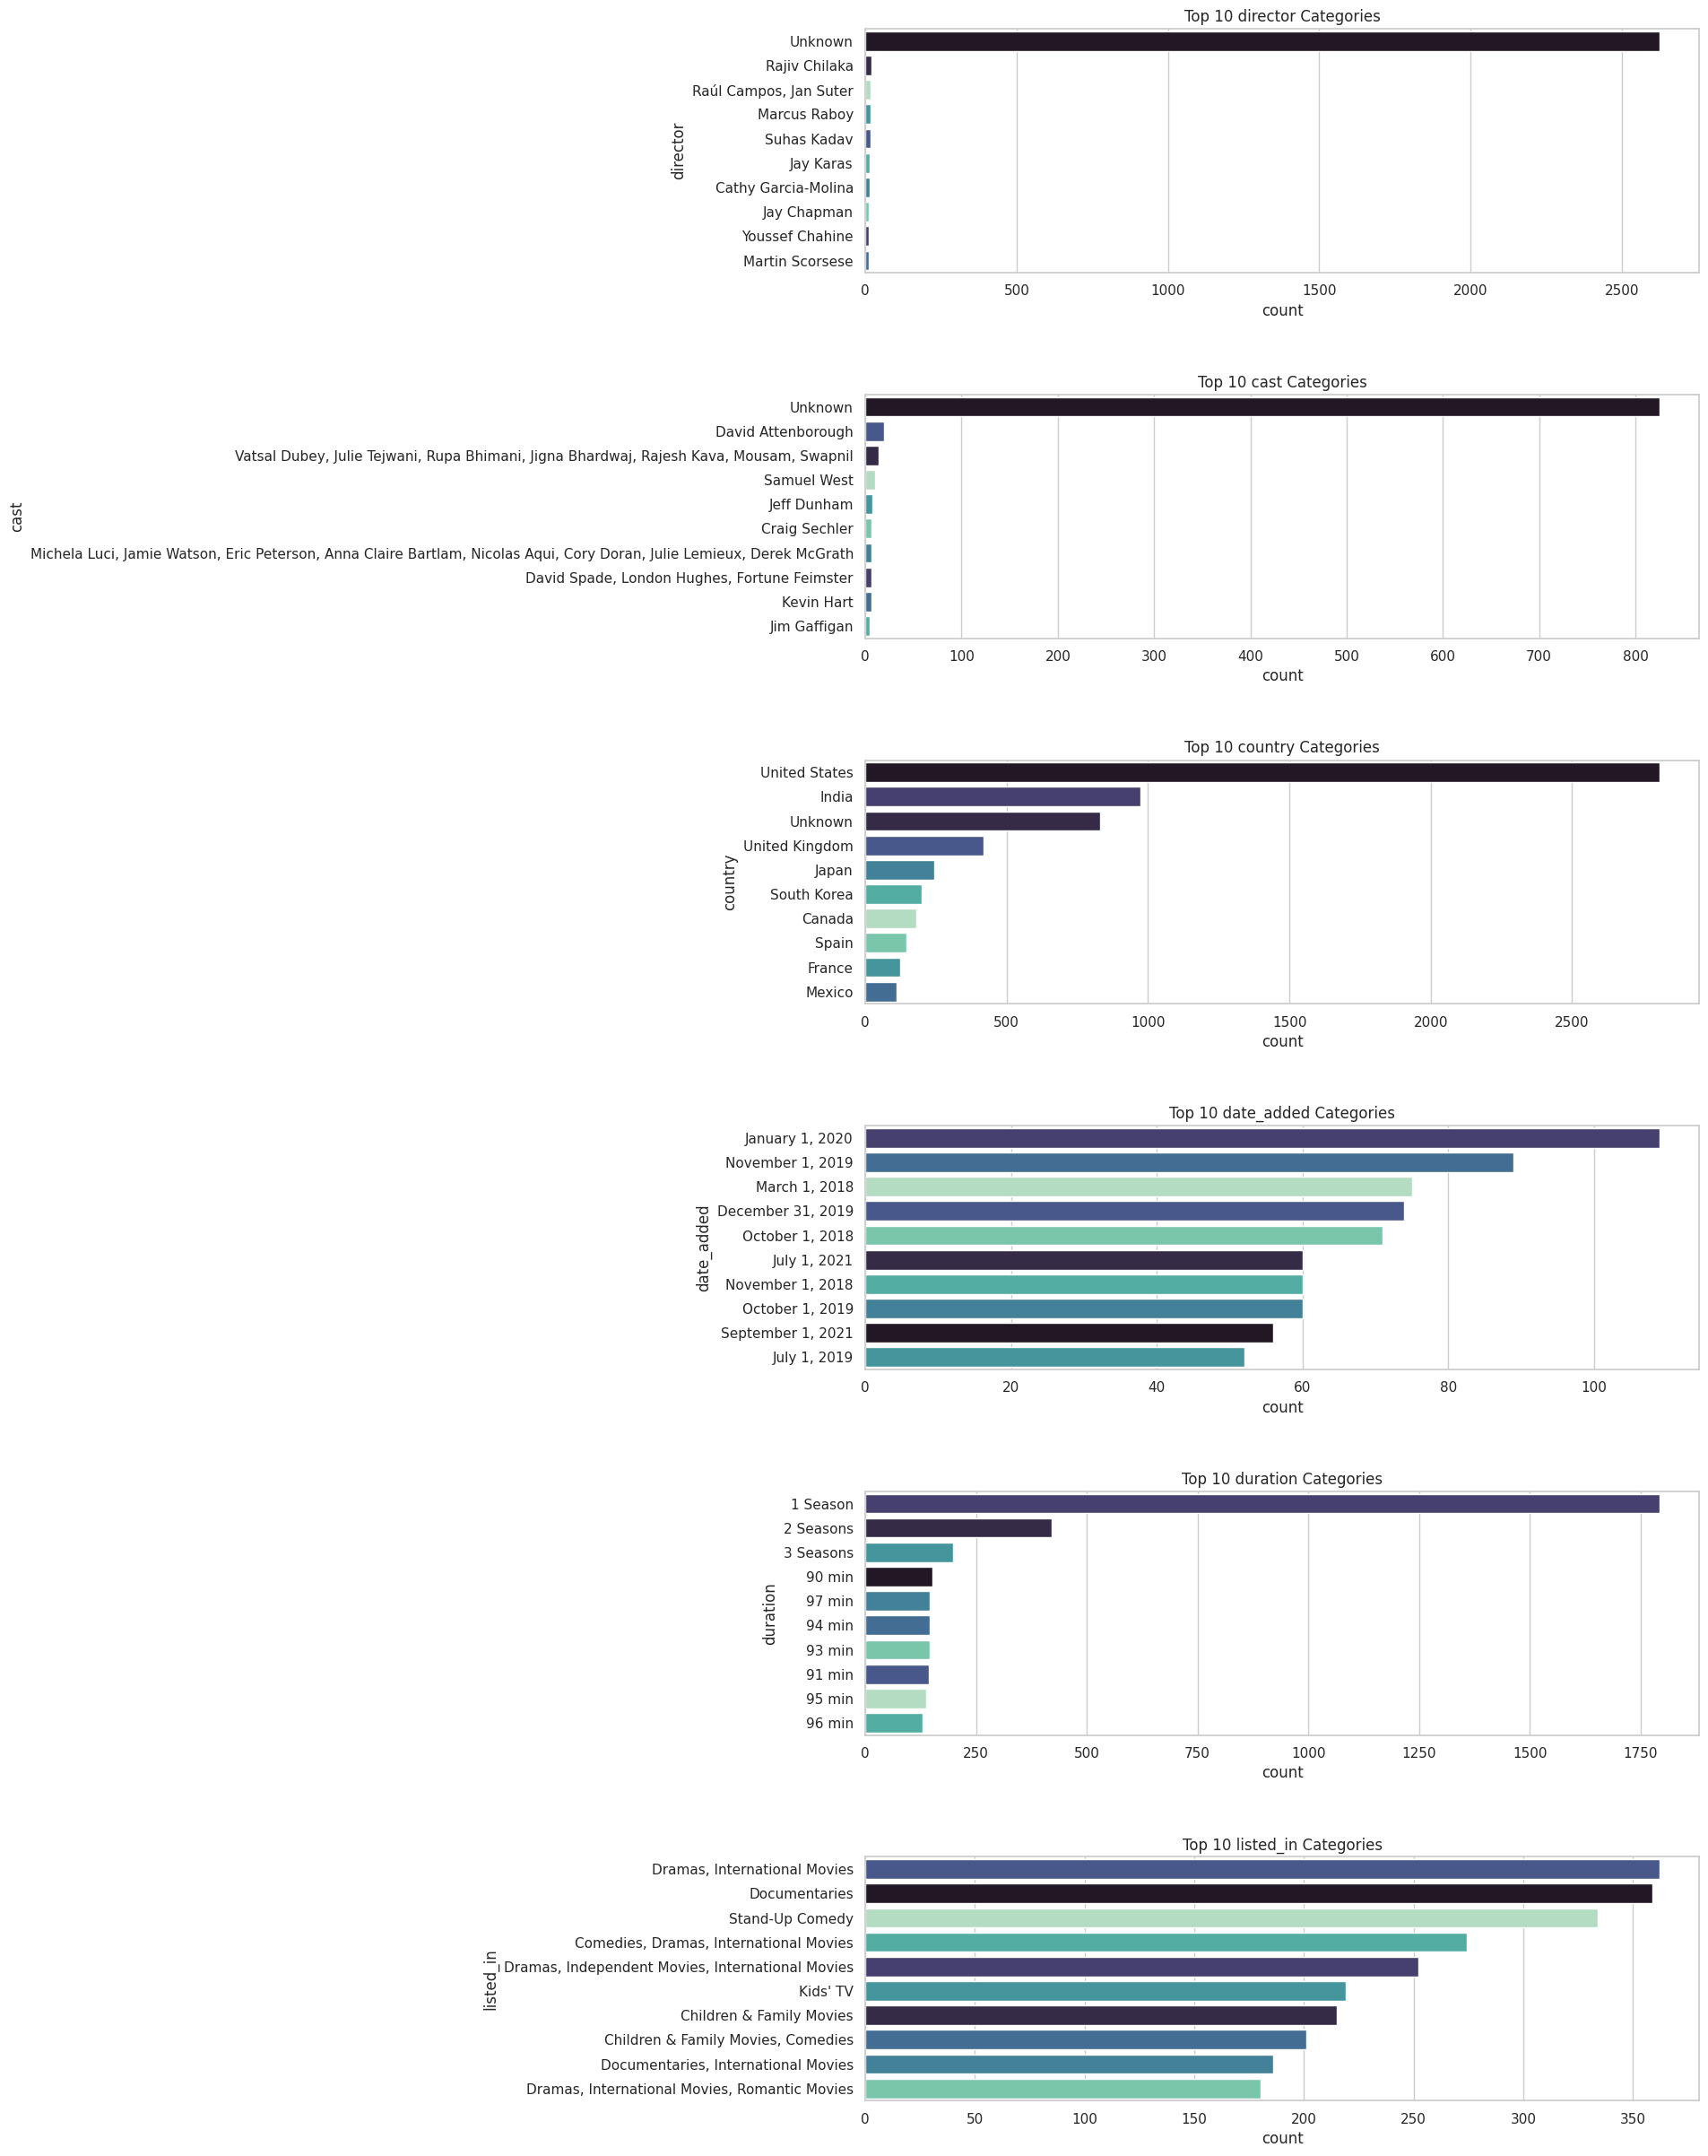

In [15]:
#Create a new categorical variables array without type and rating
cat_vars = ['director', 'cast', 'country', 'date_added', 'duration', 'listed_in']

#Univariate analysis for categorical variables
fig, axes = plt.subplots(len(cat_vars), 1, figsize=(12, 5 * len(cat_vars)))

for i, var in enumerate(cat_vars):
  ax = axes[i]

  #Limit to top 10 categories if too many unique values
  if df[var].nunique() > 10:
    top_categories = df[var].value_counts().nlargest(10).index
    sns.countplot(y=df.loc[df[var].isin(top_categories), var], order=top_categories, hue=df.loc[df[var].isin(top_categories), var], ax=ax, palette='mako', legend=False)
    ax.set_title(f'Top 10 {var} Categories')

  else:
    sns.countplot(y=df[var], order=df[var].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.subplots_adjust(hspace=0.5)
plt.show()

###**Findings of Univariate Analysis of Categorical Variables**
- `type`: There are more movies (6000+) than TV Shows (2000+)
- `rating`: The modal rating is TV-MA, which shows that Netflix favours adult content over family-friendly content
- `country`: United States was the highest contributor in terms of content
- `date_added`: January 1, 2020 had the highest number of title additions.
- `duration`: For TV Shows, the modal duration is 1 season, for movies the modal duration is 90 minutes.
- `listed_in`: The modal genre is Drama, International Movies.
- `director` & `cast`: For director and cast, most of the rows had null values.

#**Bivariate Analysis**
- Helps to identify patterns, correlations, and potential causal relationships between two variables.

1. **`type` (TV Show / Movie)**
- How does the average release year differ between movies and TV shows?
- What's the distribution of ratings for movies vs. TV Shows?
- Do genres vary significantly between types?
Which countries produce more TV Shows vs. movies?


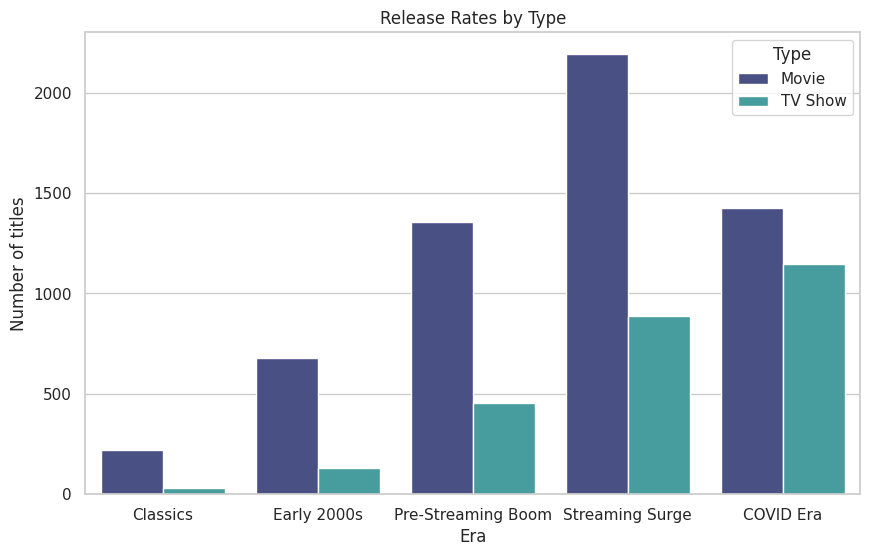

In [16]:
#Bivariate Analysis: Release Rates by Type
plt.figure(figsize=(10,6))
sns.countplot(x='era', hue='type', data=df, palette='mako')
plt.title ('Release Rates by Type')
plt.xlabel ('Era')
plt.ylabel ('Number of titles')
plt.legend(title='Type', loc='upper right')
plt.show()

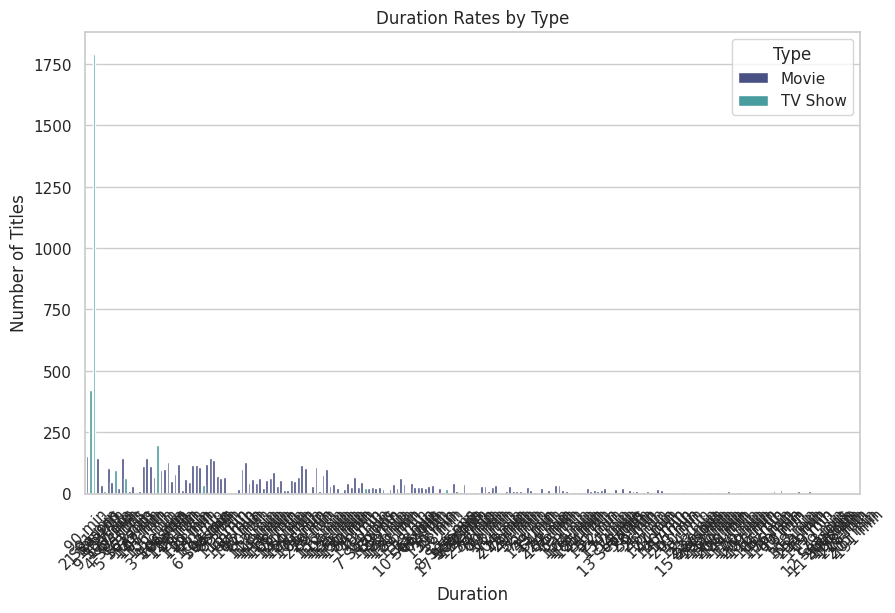

In [17]:
#Bivariate Analysis: Duration Rates by Type
plt.figure(figsize=(10,6))
sns.countplot(x='duration', hue='type', data=df, palette='mako')
plt.title('Duration Rates by Type')
plt.xlabel('Duration')
plt.ylabel('Number of Titles')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()

As seen above, the duration values are too many to be legible. The best course of action would be to split the column into 2, one for TV Shows and another for movies, as seen below.

In [18]:
#Creating a new column for movie durations in minutes
df['movie_duration'] = df.apply(
    lambda row: float(row['duration'].replace('min', '').strip())
    if row['type'] == 'Movie' and isinstance(row['duration'], str) and 'min' in row['duration']
    else None,
    axis=1
)
df['show_duration'] = df.apply(
    lambda row: float(row['duration'].replace('Seasons', '').replace('Season', '').strip())
    if row['type'] == 'TV Show' and isinstance(row['duration'],str) and 'Season' in row['duration']
    else None,
    axis=1
)

df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,era,movie_duration,show_duration
0,Movie,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,COVID Era,90.0,NaN
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",COVID Era,NaN,2.0
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",COVID Era,NaN,1.0
3,TV Show,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",COVID Era,NaN,1.0
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",COVID Era,NaN,2.0


Now, we can create a countlot for the duration, separating the seasons(TV Shows) and minutes(Movies).

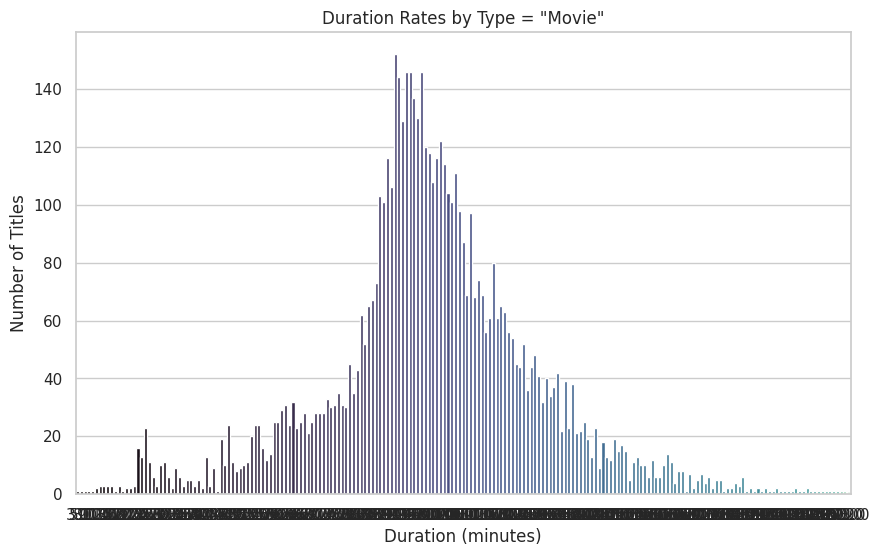

In [19]:
#Bivariate Analysis: Duration Rates by Type == Movies
plt.figure(figsize=(10,6))
sns.countplot(x='movie_duration', hue='movie_duration', data=df, palette='mako', legend=False)
plt.title('Duration Rates by Type = "Movie"')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Titles')
plt.show()

###**Binning the Movie Durations Since the Cardinality is Too High**
The bin labels explained:
- **Short** - 0 - 59 minutes
- **Medium** - 60 - 119 minutes
- **Long** - 120 - 179 minutes
- **Very Long** - 180 - 239 minutes
- **Epic** - 240 - 300 minutes

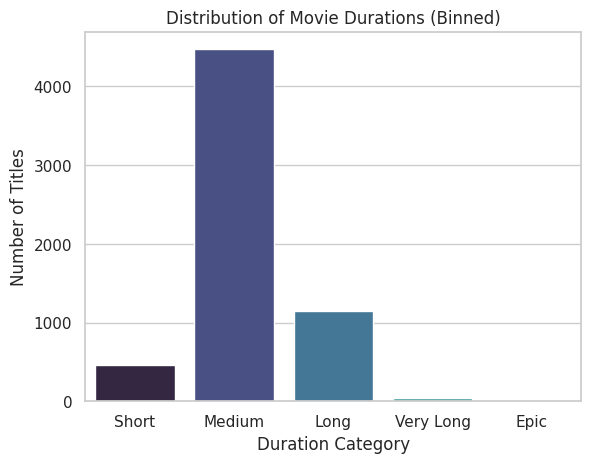

In [20]:
#Filtering out rows with NaN values in 'movie_duration
df_filtered = df.dropna(subset=['movie_duration'])

#Defining the bins and labels
bins = [0, 60, 120, 180, 240, 300]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Epic']

#Creating a new column with the binned movie durations
df_filtered = df_filtered.copy()
df_filtered['movie_duration_category'] = pd.cut(df_filtered['movie_duration'], bins=bins, labels=labels, right=False)

#Plotting the countplot for the new column
sns.countplot(x='movie_duration_category', hue='movie_duration_category', data=df_filtered, palette='mako', legend=False)
plt.title('Distribution of Movie Durations (Binned)')
plt.xlabel('Duration Category')
plt.ylabel('Number of Titles')
plt.show()